In [407]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [408]:
df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')

X = df.drop("purchaseValue",axis=1)
Y = df["purchaseValue"]

In [409]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=59)

In [410]:
X_predict = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

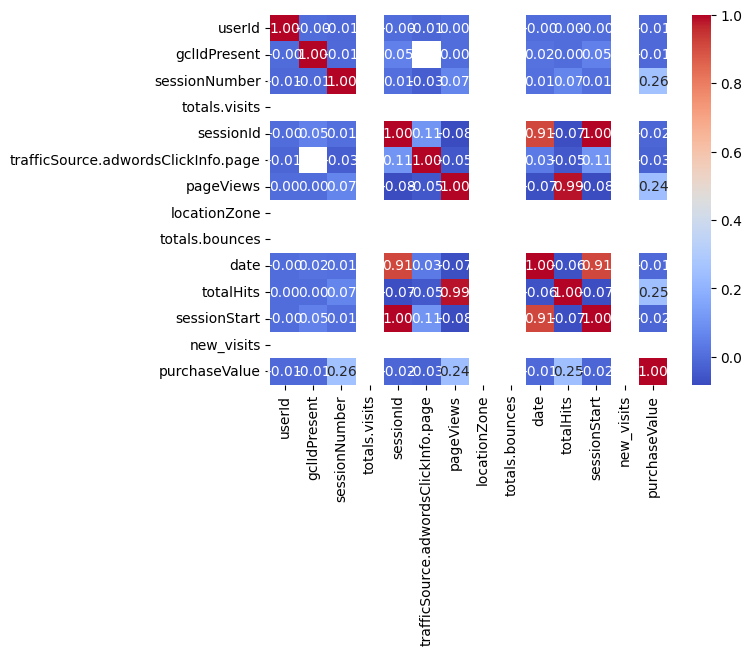

In [411]:
import seaborn as sns
sns.heatmap(pd.concat([X_train,Y_train],axis=1).select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [412]:
# Lkeep = ['device.mobileDeviceBranding', 'gclIdPresent',
#        'totals.visits','trafficSource.adwordsClickInfo.isVideoAd','pageViews',
#        'device.mobileDeviceModel','totals.bounces','totalHits','device.isMobile','new_visits']
Lkeep = list(df.columns)
L7 = ['userId','sessionId','trafficSource.adwordsClickInfo.page','sessionStart','geoNetwork.region',
      'trafficSource.adwordsClickInfo.adNetworkType','geoNetwork.city','geoNetwork.metro','trafficSource.referralPath','trafficSource.adContent','geoNetwork.continent'] 
# They had very distributed values, or had too many not in dataset values, so removed them, checked each of them by doing value_counts()

for j in L7:
    Lkeep.remove(j)
# ['purchaseValue', 'browser', 'trafficSource.adContent', 'trafficSource.keyword', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'userId', 'trafficSource.campaign', 'geoNetwork.networkDomain', 'gclIdPresent', 'sessionNumber', 'geoNetwork.region', 'trafficSource', 'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'locationCountry', 'trafficSource.adwordsClickInfo.adNetworkType', 'geoNetwork.city', 'trafficSource.adwordsClickInfo.page', 'geoNetwork.metro', 'pageViews', 'trafficSource.referralPath', 'date', 'deviceType', 'userChannel', 'totalHits', 'sessionStart', 'geoNetwork.continent', 'device.isMobile']

for i in df.columns:
    if len(df[i].value_counts())==1 or 'trafficSource' in i:
        if i in Lkeep:
            print(i)
            Lkeep.remove(i)
Lkeep.remove('purchaseValue')
# print(Lkeep)

trafficSource.isTrueDirect
device.screenResolution
trafficSource.keyword
screenSize
trafficSource.adwordsClickInfo.slot
device.mobileDeviceBranding
device.mobileInputSelector
trafficSource.campaign
device.mobileDeviceMarketingName
device.operatingSystemVersion
device.flashVersion
trafficSource
totals.visits
geoNetwork.networkLocation
trafficSource.medium
trafficSource.adwordsClickInfo.isVideoAd
browserMajor
device.browserSize
socialEngagementType
locationZone
device.mobileDeviceModel
totals.bounces
device.language
device.browserVersion
device.screenColors
new_visits


In [413]:
X_train = X_train[Lkeep]
X_test = X_test[Lkeep]
X_predict = X_predict[Lkeep]

<Axes: >

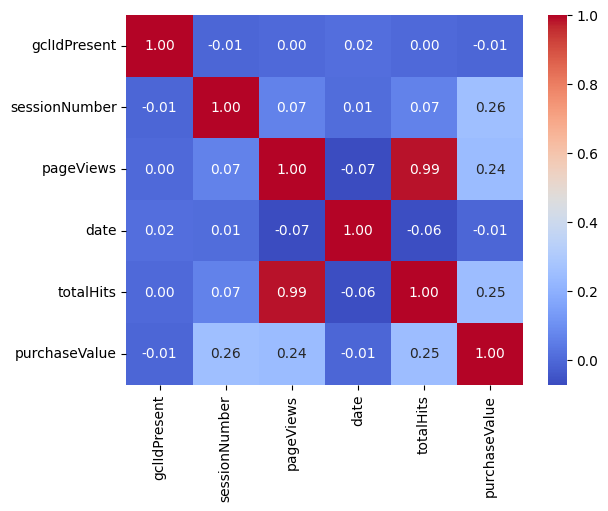

In [414]:
sns.heatmap(pd.concat([X_train,Y_train],axis=1).select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [415]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 92818 entries, 65977 to 102577
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   browser                   92818 non-null  object 
 1   geoCluster                92818 non-null  object 
 2   geoNetwork.networkDomain  92818 non-null  object 
 3   gclIdPresent              92818 non-null  int64  
 4   sessionNumber             92818 non-null  int64  
 5   os                        92818 non-null  object 
 6   geoNetwork.subContinent   92818 non-null  object 
 7   locationCountry           92818 non-null  object 
 8   pageViews                 92812 non-null  float64
 9   date                      92818 non-null  int64  
 10  deviceType                92818 non-null  object 
 11  userChannel               92818 non-null  object 
 12  totalHits                 92818 non-null  int64  
 13  device.isMobile           92818 non-null  bool   
dtypes: boo

##################


browser -> One hot encoding maybe? but too many browsers are there, but it does matter quite a bit
maybe i could just do for the popular browsers

trafficSource.adContent -> might be null and string based

trafficSource.keyword -> might be null and string based

geoCluster -> divides into 5 regions and is not null

trafficSource.adwordsClickInfo.slot -> 3 different possible values

trafficSource.campaign -> String based and not null

geoNetwork.networkDomain -> 3 possible domains, not null, do one hot encoding

sessionNumber -> not null , has a unexpected correlation with purchaseValue

trafficSource -> not null, string based, too many values

os -> around 20 not null, could help

geoNetwork.subContinent -> zone wise continent, not null, string, will help

trafficSource.medium -> medium for reaching, not null, string, around 7 distinct values

locationCountry -> String not null, too many distinct but will help for sure

pageViews -> Integer not null

deviceType -> oneHotEncoding, only 3 values present not null

userChannel -> not null 8 distinct values

totalHits -> not null Integer

geoNetwork.continent -> Continent Not Null

device.isMobile -> True of False not null

In [416]:
print(df['device.isMobile'].value_counts())

device.isMobile
False    86494
True     29529
Name: count, dtype: int64


In [417]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# def preprocess_df(df, top_n=10, scaler=None, fit_scaler=True, col_order=None, num_cols_ref=None):
#     df = df.copy()

#     str_cols = df.select_dtypes(include='object').columns
#     df[str_cols] = df[str_cols].fillna("Missing")
#     df['device.isMobile'] = df['device.isMobile'].astype(int)

#     for col in ['trafficSource', 'trafficSource.campaign']:
#         freq = df[col].value_counts().to_dict()
#         df[col + "_freq"] = df[col].map(freq)

#     for col in ['browser', 'os']:
#         top = df[col].value_counts().nlargest(top_n).index
#         for cat in top:
#             df[f"{col}_{cat}"] = (df[col] == cat).astype(int)
#         df[f"{col}_Other"] = (~df[col].isin(top)).astype(int)
#         df.drop(columns=col, inplace=True)

#     low_card = [
#         'geoNetwork.networkDomain',
#         'trafficSource.adwordsClickInfo.slot',
#         'deviceType',
#         'userChannel',
#         'trafficSource.medium',
#         'geoNetwork.subContinent',
#         'geoNetwork.continent',
#         'geoCluster'
#     ]
#     df = pd.get_dummies(df, columns=low_card, prefix=low_card)

#     if col_order is not None:
#         df = df.reindex(columns=col_order, fill_value=0)

#     if num_cols_ref is None:
#         num_cols = df.select_dtypes(include=['int64', 'float64']).columns
#     else:
#         num_cols = num_cols_ref

#     if scaler is None and fit_scaler:
#         scaler = StandardScaler()
#         df[num_cols] = scaler.fit_transform(df[num_cols])
#     elif scaler is not None:
#         df[num_cols] = scaler.transform(df[num_cols])

#     if col_order is None:
#         col_order = df.columns.tolist()
#     if num_cols_ref is None:
#         num_cols_ref = num_cols.tolist()

#     return df, scaler, col_order, num_cols_ref


In [418]:
for df in [X_train, X_test, X_predict]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
for df in [X_train, X_test, X_predict]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
for df in [X_train, X_test, X_predict]:
    df.drop('date', axis=1, inplace=True)
for df in [X_train, X_test, X_predict]:
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek']/7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek']/7)
    df.drop(['month','dayofweek'],inplace=True,axis=1)

In [419]:
print(X_train.columns,X_test.columns)

Index(['browser', 'geoCluster', 'geoNetwork.networkDomain', 'gclIdPresent',
       'sessionNumber', 'os', 'geoNetwork.subContinent', 'locationCountry',
       'pageViews', 'deviceType', 'userChannel', 'totalHits',
       'device.isMobile', 'year', 'day', 'is_weekend', 'quarter', 'dayofyear',
       'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos'],
      dtype='object') Index(['browser', 'geoCluster', 'geoNetwork.networkDomain', 'gclIdPresent',
       'sessionNumber', 'os', 'geoNetwork.subContinent', 'locationCountry',
       'pageViews', 'deviceType', 'userChannel', 'totalHits',
       'device.isMobile', 'year', 'day', 'is_weekend', 'quarter', 'dayofyear',
       'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos'],
      dtype='object')


In [420]:
assert(list(X_train.columns)==list(X_test.columns))

In [421]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

def replace_true_false(X):
    return np.where(X == True, 1, np.where(X == False, 0, X))

categorical_cols = ['geoNetwork.subContinent', 'geoCluster', 'os', 'geoNetwork.networkDomain', 'userChannel', 'deviceType', 'browser']
for col in categorical_cols:
    assert col in X_train.columns

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# freq = X_train['locationCountry'].value_counts() / len(X_train)
# X_train['location_freq'] = X_train['locationCountry'].map(freq)
# X_test['location_freq'] = X_test['locationCountry'].map(freq)
# X_predict['location_freq'] = X_predict['locationCountry'].map(freq)
# for df in [X_train, X_test, X_predict]:
#     df.drop(['locationCountry'], axis=1, inplace=True)

numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

X_train_enc = preprocess.fit_transform(X_train)
X_test_enc = preprocess.transform(X_test)
X_predict_enc = preprocess.transform(X_predict)

encoded_cat_cols = preprocess.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(encoded_cat_cols) + numeric_cols

X_train_enc = pd.DataFrame(X_train_enc, columns=all_columns, index=X_train.index)
X_test_enc = pd.DataFrame(X_test_enc, columns=all_columns, index=X_test.index)
X_predict_enc = pd.DataFrame(X_predict_enc, columns=all_columns, index=X_predict.index)

pipeline = Pipeline(steps=[('replace_true_false', FunctionTransformer(replace_true_false, validate=False))])
X_train_pre = pipeline.transform(X_train_enc)
X_test_pre = pipeline.transform(X_test_enc)
X_predict_pre = pipeline.transform(X_predict_enc)

X_train_pre = pd.DataFrame(X_train_pre, columns=all_columns, index=X_train.index)
X_test_pre = pd.DataFrame(X_test_pre, columns=all_columns, index=X_test.index)
X_predict_pre = pd.DataFrame(X_predict_pre, columns=all_columns, index=X_predict.index)

for col in X_train_pre.columns:
    try:
        X_train_pre[col] = X_train_pre[col].astype(int)
        X_test_pre[col] = X_test_pre[col].astype(int)
        X_predict_pre[col] = X_predict_pre[col].astype(int)
    except:
        pass

X_train_pre = X_train_pre.select_dtypes(include=['number'])
X_test_pre = X_test_pre.select_dtypes(include=['number'])
X_predict_pre = X_predict_pre.select_dtypes(include=['number'])

X_test_pre = X_test_pre.reindex(columns=X_train_pre.columns, fill_value=0)
X_predict_pre = X_predict_pre.reindex(columns=X_train_pre.columns, fill_value=0)


In [422]:
def func(L,L1):
    for i in L:
        if i not in L1:
            print(i)
if list(X_train_pre.columns)!=list(X_predict_pre.columns):
    func(X_train_pre.columns,X_test_pre.columns)

In [423]:
for i in X_train_pre.columns:
    if 'not set' in i:
        print(i)
        for j in [X_train_pre,X_test_pre,X_predict_pre]:
            j.drop([i],inplace=True,axis=1)

geoNetwork.subContinent_(not set)
os_(not set)
browser_(not set)


In [424]:
X_predict_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Columns: 101 entries, geoNetwork.subContinent_Australasia to dayofweek_cos
dtypes: int64(101)
memory usage: 22.4 MB


In [425]:
X_train_pre.shape

(92818, 101)

In [426]:
X_train_pre.head()

,geoNetwork.subContinent_Australasia,geoNetwork.subContinent_Caribbean,geoNetwork.subContinent_Central America,geoNetwork.subContinent_Central Asia,geoNetwork.subContinent_Eastern Africa,geoNetwork.subContinent_Eastern Asia,geoNetwork.subContinent_Eastern Europe,geoNetwork.subContinent_Melanesia,geoNetwork.subContinent_Micronesian Region,geoNetwork.subContinent_Middle Africa,...,device.isMobile,year,day,is_weekend,quarter,dayofyear,month_sin,month_cos,dayofweek_sin,dayofweek_cos
65977,0,0,0,0,0,0,0,0,0,0,...,0,1970,1,0,1,1,0,0,0,0
57960,0,0,0,0,0,0,0,0,0,0,...,0,1970,1,0,1,1,0,0,0,0
25128,0,0,0,0,0,1,0,0,0,0,...,0,1970,1,0,1,1,0,0,0,0
59384,0,0,0,0,0,0,0,0,0,0,...,0,1970,1,0,1,1,0,0,0,0
60612,0,0,0,0,0,0,0,0,0,0,...,0,1970,1,0,1,1,0,0,0,0


In [427]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer,KNNImputer
# from sklearn.preprocessing import OneHotEncoder,FunctionTransformer
# from sklearn.compose import ColumnTransformer

# def replace_true_false(X):
#     return np.where(X == True, 1, np.where(X == False, 0, X))

# pipeline = Pipeline(steps=[
#     ('replace_true_false', FunctionTransformer(replace_true_false, validate=False)),
#     ('imputer', KNNImputer(n_neighbors=5))
# ])

In [428]:
# pipeline.fit(X_train)

In [429]:
# X_train = pipeline.transform(X_train)
# X_test = pipeline.transform(X_test)
# X_predict = pipeline.transform(X_predict)

In [430]:
# from sklearn.ensemble import RandomForestRegressor
# # model = LinearRegression()
# # rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
# # rf_model.fit(X_train,Y_train)
# # from sklearn.linear_model import LinearRegression
# # from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# # from sklearn.ensemble import RandomForestRegressor

# # rf_model = RandomForestRegressor()

# # param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'max_depth': [5, 10, 20, None],
# #     'min_samples_split': [2, 10, 20],
# #     'min_samples_leaf': [1, 2, 4]
# # }

# # random_search = RandomizedSearchCV(
# #     estimator=rf_model,
# #     param_distributions=param_grid,
# #     n_iter=10,
# #     cv=2,
# #     scoring='r2',
# #     n_jobs=-1,
# #     verbose=1
# # )

# # random_search.fit(X_train, Y_train)
# # rf_model = random_search.best_estimator_

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import RidgeCV
# from sklearn.preprocessing import PolynomialFeatures

# model = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly',PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
#     ('ridge', RidgeCV(alphas=[0.01], cv=5))
# ])
# model.fit(X_train_pre, Y_train)
# print("Train R2:", r2_score(Y_train, model.predict(X_train_pre)))
# print("Test R2:", r2_score(Y_test, model.predict(X_test_pre)))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# text_cols = [
#     'trafficSource.adContent',
#     'trafficSource.keyword',
#     'trafficSource.campaign',
#     'trafficSource',
#     'locationCountry'
# ]
# num_cols = [c for c in X_train_pre.columns if c not in text_cols]

# flatten = FunctionTransformer(lambda X: X.ravel(), validate=False)

# preprocessor = ColumnTransformer([
#     *[
#         (
#             f"tfidf_{col}",
#             Pipeline([
#                 ('impute', SimpleImputer(strategy='constant', fill_value='')),
#                 ('flatten', flatten),
#                 ('tfidf', TfidfVectorizer(max_features=100, stop_words='english'))
#             ]),
#             [col]
#         )
#         for col in text_cols
#     ],
#     (
#         'num',
#         Pipeline([
#             ('impute', SimpleImputer(strategy='mean')),
#             ('scale',   StandardScaler())
#         ]),
#         num_cols
#     )
# ], remainder='drop')
from sklearn.linear_model import RidgeCV

pipeline = Pipeline([
    # ('preproc', preprocessor),
    # ('to_dense', FunctionTransformer(lambda X: X.toarray(), accept_sparse=True)),
    ('impute',SimpleImputer(strategy='mean')),
    # ('imputer', KNNImputer(n_neighbors=5)),
    ('scale',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    # ('model', Ridge())
    # ('model', Lasso(alpha=0.1, max_iter=1000))
    # ('model',RandomForestRegressor(n_estimators=100,random_state=200,n_jobs=-1)),
    # ('reg', HistGradientBoostingRegressor(
    #     max_iter=200,
    #     learning_rate=0.05,
    #     max_depth=2,
    #     min_samples_leaf=10,
    #     l2_regularization=2.0,
    #     # random_state=22,
    #     # verbose=1
    # ))
    ('ridge', RidgeCV(alphas=[0.01], cv=5))
    # ('model', XGBRegressor(objective='reg:squarederror', max_depth=4, learning_rate=0.1, n_estimators=100, eval_metric='rmse', use_label_encoder=False))
    # ('lgbm', LGBMRegressor(
    #     n_estimators=1000,
    #     learning_rate=0.05,
    #     max_depth=6,
    #     random_state=42,
    #     n_jobs=-1
    # ))

])


pipeline.fit(X_train_pre, Y_train)

from sklearn.metrics import r2_score

print(r2_score(Y_test,pipeline.predict(X_test_pre)))
print(r2_score(Y_train,pipeline.predict(X_train_pre)))

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for col in X_train_pre.columns:
#     sns.kdeplot(X_train_pre[col], label='Train', fill=True)
#     sns.kdeplot(X_predict_pre[col], label='Predict', fill=True)
#     plt.title(col)
#     plt.legend()
#     plt.show()


In [ ]:
# from xgboost import XGBRegressor

# xgb_model = XGBRegressor(
#     objective='reg:squarederror',
#     max_depth=10,
#     learning_rate=0.05,
#     n_estimators=250,
#     eval_metric='rmse',
#     use_label_encoder=False
# )

# xgb_model.fit(
#     X_train_pre[:-5000], Y_train[:-5000],
#     eval_set=[(X_train_pre[-5000:], Y_train[-5000:])],
#     early_stopping_rounds=200,
#     verbose=False
# )

# from sklearn.metrics import r2_score

# print("Train R2:", r2_score(Y_train, xgb_model.predict(X_train_pre)))
# print("Test R2:", r2_score(Y_test, xgb_model.predict(X_test_pre)))

# pipeline = xgb_model

In [ ]:
Y_predict = pipeline.predict(X_predict_pre)

In [ ]:
Y = pd.DataFrame({'id': range(len(Y_predict)), 'purchaseValue': Y_predict})

In [ ]:
Y

In [ ]:
Y.to_csv("/kaggle/working/submission.csv",index=False)